# Computer vision

<br>

Computer vision is an interdisciplinary scientific field that deals with how computers can be made to gain high-level understanding from digital images or videos. From the perspective of engineering, it seeks to automate tasks that the human visual system can do.

Computer vision tasks include methods for acquiring, processing, analyzing and understanding digital images, and extraction of high-dimensional data from the real world in order to produce numerical or symbolic information.

from image data using models constructed with the aid of geometry, physics, statistics, and learning theory.

As a scientific discipline, computer vision is concerned with the theory behind artificial systems that extract information from images. The image data can take many forms, such as video sequences, views from multiple cameras, or multi-dimensional data from a medical scanner. As a technological discipline, computer vision seeks to apply its theories and models for the construction of computer vision systems.

<br>

## Human eye and Camera analogy

### Human eye

![alt text](Human_eye.jpg "Human eye")

<br>
<br>

### Camera CCD (*Charge-Coupled Device*)

![alt text](Camera_ccd.png "Camera CCD")

<br>
<br>

## Digital image into a matrix

<br>

Every digital image is divided into a matrix or array of small picture elements, or **pixels**.  Each pixel is represented by a numerical value.

In a mathematical way, we can assert the next equation for black and white pictures.

\begin{equation*}
Image = (a_{k,j})_{MxN}
\end{equation*}

Where:
- $k = 0$,  Black
- $j = 255$,  White
- $M = $ Height of the image
- $N = $ Width of the image

![alt text](Pulqueria.png "Pulqueria")

<br>

Each pixel can get values between 0 and 255 (0 = black, 255 = white and all the ), i.e. every pixel can store a byte (8 bits) of information for a gray-scale image.

<br>
<br>

In the case for color-pictures, in computer vision is useful the RGB paradigm. A 3D matrix is equivalent to a colored image.

\begin{equation*}
Image = (a_{k,j})_{MxNx3}
\end{equation*}

<br>
<br>

![alt text](RGB_layers.png "RGB_layers")

<br>

For this case, each pixel stores 3 bytes of information (24 bits).

<br>
<br>

### Let's start with some examples

In the next sections you will see how the **computer vision** works. Let's start for getting an image and handling it as matrix.

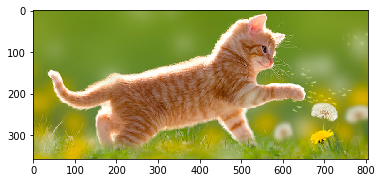

In [3]:
# Python needs some libreries to work.
# Normally, every Python-script needs the calling of the needed libreries as
# first step

import numpy as np                       # Librery to linear algebra (vectors, matrices, etc.)
import cv2                               # Librery to handle, transform and manipulate images
from matplotlib import pyplot as plt     # Librery to manage plotting

# Getting the image
img = cv2.imread('Kitty.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Matplotlib expects images in RGB format but OpenCV provides them in BGR

# Show the image
plt.imshow(img)
plt.show()

### Reference System

In the previeous image we can see the *reference system* for an image.

The coordenates (0, 0) are placed in the corner up-left.

In [4]:
# Getting dimensions
dimensions = img.shape
print(dimensions)

print("It means, the image has " + str(dimensions[0]) + " pixels in height, " + str(dimensions[1]) + " pixels in width and " + str(dimensions[2]) + " pixels in depth")

(357, 805, 3)
It means, the image has 357 pixels in height, 805 pixels in width and 3 pixels in depth


### Splitting an image into RGB components

We will split the kitty image in their RGB components. There are many ways to do this. OpenCV has his own way to split images:

```
red_layer, green_layer, blue_layer = cv2.split(img)
```

For this example we will split the kitty image in the next way:

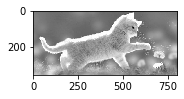

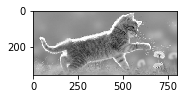

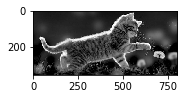

In [5]:
img_red_layer = img[:, :, 0]     # Select only the 0 layer of the 3D matrix
img_green_layer = img[:, :, 1]   # Select only the 1 layer of the 3D matrix
img_blue_layer = img[:, :, 2]    # Select only the 2 layer of the 3D matrix

# Show the red layer
plt.subplot(311)
plt.imshow(img_red_layer, cmap = 'gray')
plt.show()

# Show the green layer
plt.subplot(312)
plt.imshow(img_green_layer, cmap = 'gray')
plt.show()

# Show the blue layer
plt.subplot(313)
plt.imshow(img_blue_layer, cmap = 'gray')
plt.show()

### Probe an image is a matrix

As the previous text indicated, an image is a 2D or 3D image. To probe that, an extract of 10 by 10 will be taken and analized.

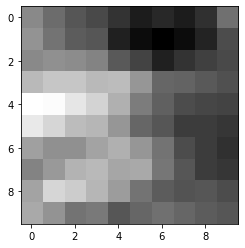

In [7]:
plt.imshow(img_blue_layer[200:210, 300:310], cmap = 'gray')
plt.show()

In [9]:
print(img_blue_layer[200:210, 300:310])

[[ 68  59  52  48  41  34  38  34  40  60]
 [ 71  61  54  52  35  29  25  29  36  49]
 [ 68  70  69  66  53  46  35  41  45  48]
 [ 83  87  87  83  84  72  57  56  53  50]
 [105 104  97  91  80  64  55  49  47  46]
 [ 98  92  84  82  72  57  52  44  44  42]
 [ 75  70  70  76  80  72  61  49  44  40]
 [ 66  73  81  83  77  78  62  52  44  42]
 [ 76  92  89  82  74  61  54  51  52  49]
 [ 78  71  61  63  52  57  60  57  54  52]]


### Show a colored-image for each RGB component

Remember that, a colored image needs 3 layers (RGB). That is way in the previous exercises, despite having obtained the *red layer*, the *green layer* and the *blue layer* we cannot see a red-image, green-image nor blue-image. A simple-layer-image was plotted.

Get a colored-image showing each RGB component is possible. We have to merge a *red layer*, *green layer* or *blue layer* with  other two zero-layers (same size, height and width) and place it in the right position. Next image.

![alt text](RGB_places.png "RGB_places")

<br>

Now, we will plot each RGB layer in a colored way.

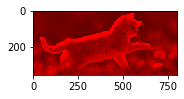

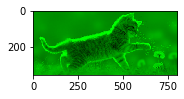

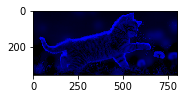

In [11]:
zero_image = np.zeros((dimensions[0], dimensions[1]), np.uint8)

img_red = cv2.merge((img_red_layer, zero_image, zero_image))
img_green = cv2.merge((zero_image, img_green_layer, zero_image))
img_blue = cv2.merge((zero_image, zero_image, img_blue_layer))

plt.subplot(311)
plt.imshow(img_red)
plt.show()

plt.subplot(312)
plt.imshow(img_green)
plt.show()

plt.subplot(313)
plt.imshow(img_blue)
plt.show()